In [4]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement scikitlearn (from versions: none)
ERROR: No matching distribution found for scikitlearn


In [5]:
###Step 1: Data Sourcing and Understanding


In [8]:
import pandas as pd

# Load the dataset
loan_data = pd.read_csv('loan.csv')

# Load the data dictionary (if it's a structured file like Excel)
data_dict = pd.read_excel('Data_Dictionary.xlsx')

# Display the first few rows of the loan dataset
print("Loan Data Sample:")
print(loan_data.head())

# Display the data dictionary to understand the variables
print("Data Dictionary:")
print(data_dict.head())

/var/folders/4v/6mdnm6fs2nn5qvhflh0fjzy80000gn/T/ipykernel_40875/3455044053.py:4: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan.csv')


Loan Data Sample:
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            

In [9]:
# 1. Fix Missing Values
# Identify missing values

In [10]:

missing_values = loan_data.isnull().sum()

# Print the columns with missing values
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:
emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64


In [26]:
missing_values['annual_inc']

np.int64(0)

In [27]:
loan_data['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [28]:
loan_data['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

Potential High-Income Outliers:
       annual_inc
1463     525000.0
1808     550000.0
5168     725000.0
7247    1782000.0
7511     543000.0
...           ...
36474    700000.0
39089   2039784.0
39098    572400.0
39438    522000.0
39554    616000.0

[67 rows x 1 columns]


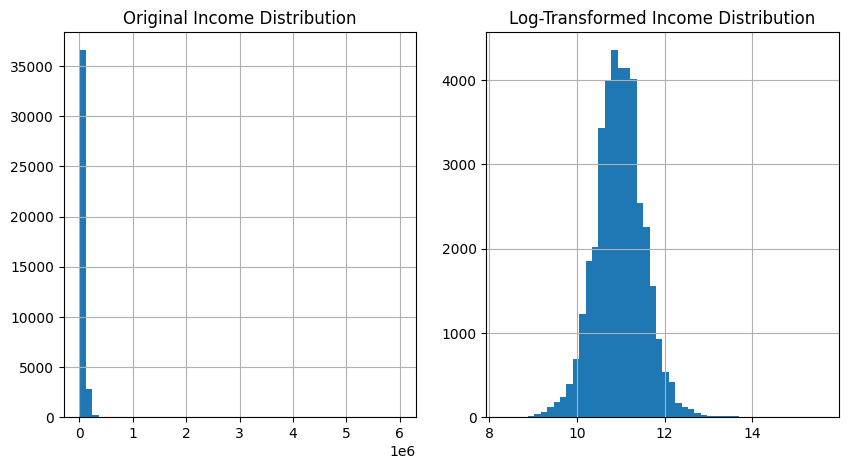

In [31]:
# Identify potential outliers
high_income_outliers = loan_data[loan_data['annual_inc'] > 500000]
print("Potential High-Income Outliers:")
print(high_income_outliers[['annual_inc']])

# Option 1: Cap the outliers
loan_data['annual_inc_capped'] = loan_data['annual_inc'].apply(lambda x: min(x, 500000))

# Option 2: Apply log transformation
import numpy as np
loan_data['annual_inc_log'] = np.log1p(loan_data['annual_inc'])

# Visualize the distributions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
loan_data['annual_inc'].hist(bins=50)
plt.title('Original Income Distribution')

plt.subplot(1, 2, 2)
loan_data['annual_inc_log'].hist(bins=50)
plt.title('Log-Transformed Income Distribution')

plt.show()

In [32]:
loan_data['annual_inc_log'].describe()

count    39717.000000
mean        10.972990
std          0.558838
min          8.294300
25%         10.606709
50%         10.985310
75%         11.318139
max         15.607270
Name: annual_inc_log, dtype: float64

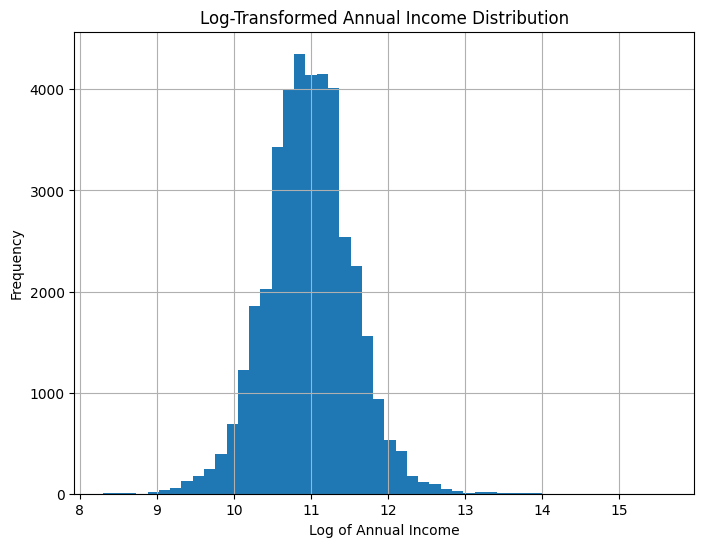

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
loan_data['annual_inc_log'].hist(bins=50)
plt.title('Log-Transformed Annual Income Distribution')
plt.xlabel('Log of Annual Income')
plt.ylabel('Frequency')
plt.show()

In [34]:
# The problem statement is more around taking decesion of not missing good customers and not giving loan to likely defaulters, 
# therefore this little skewness in above is not much critical. Lets capped these values so that skewness is reduced as well as 
# we will not loose information. 

In [38]:
# Cap the outliers at a threshold, e.g., $500,000
loan_data['annual_inc_capped'] = loan_data['annual_inc'].apply(lambda x: min(x, 500000))


Non-Numeric Columns:
Index(['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')
Loan Status Counts:
loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


/var/folders/4v/6mdnm6fs2nn5qvhflh0fjzy80000gn/T/ipykernel_40875/3346282955.py:7: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan.csv')


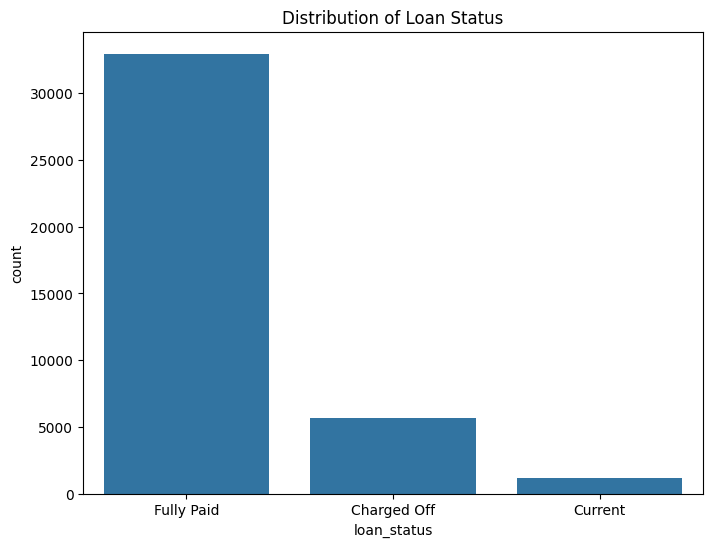


Interest Rate Statistics:
count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64


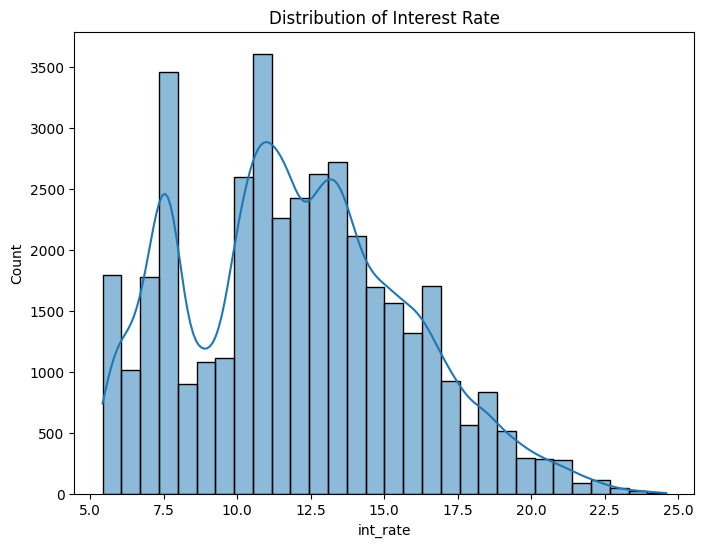

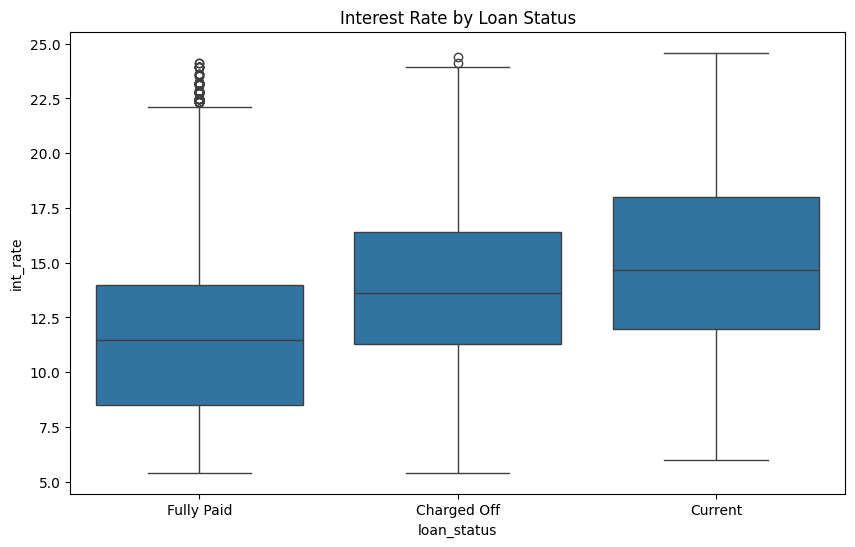


Loan Term Counts:
term
36    29096
60    10621
Name: count, dtype: int64


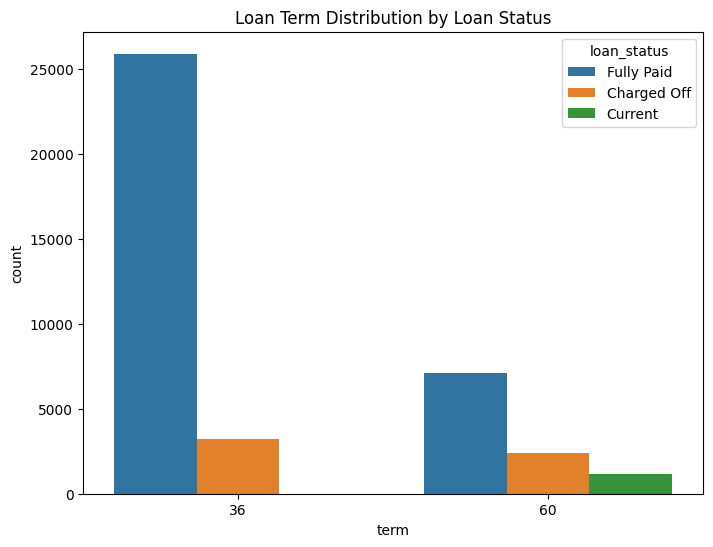


Employment Length Counts:
emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64


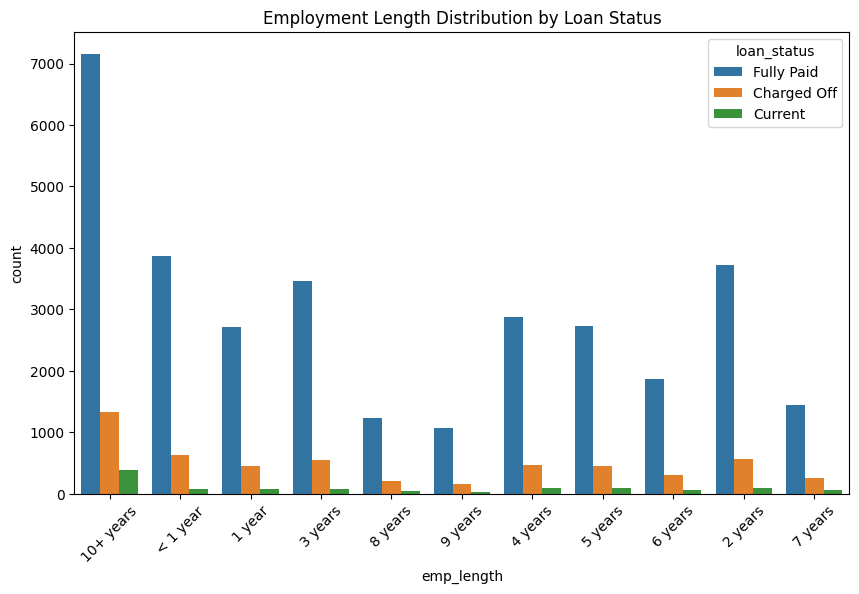


Home Ownership Counts:
home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64


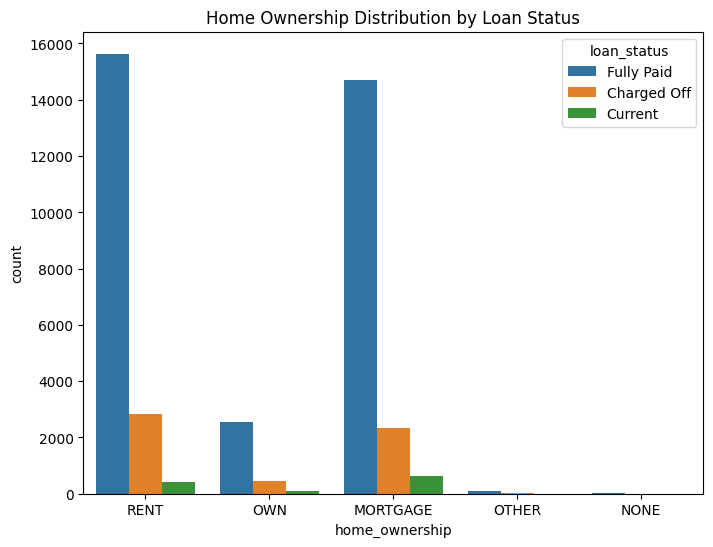


Annual Income Statistics:
count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


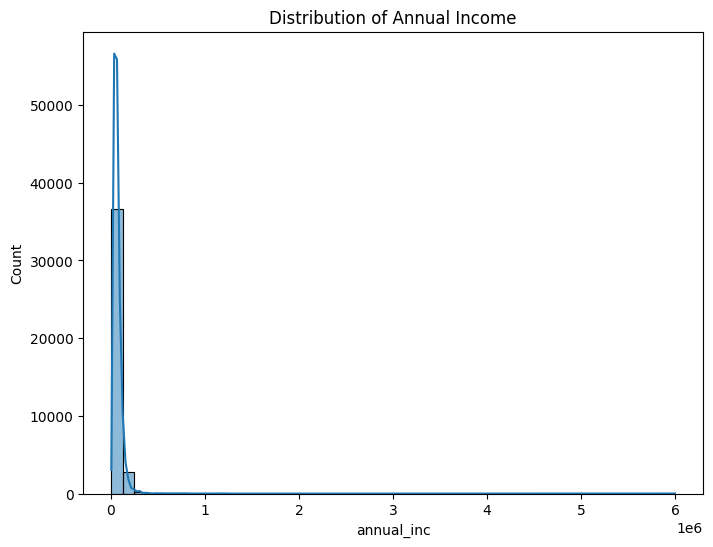


Log-Transformed Annual Income Statistics:
count    39717.000000
mean        10.972990
std          0.558838
min          8.294300
25%         10.606709
50%         10.985310
75%         11.318139
max         15.607270
Name: annual_inc_log, dtype: float64


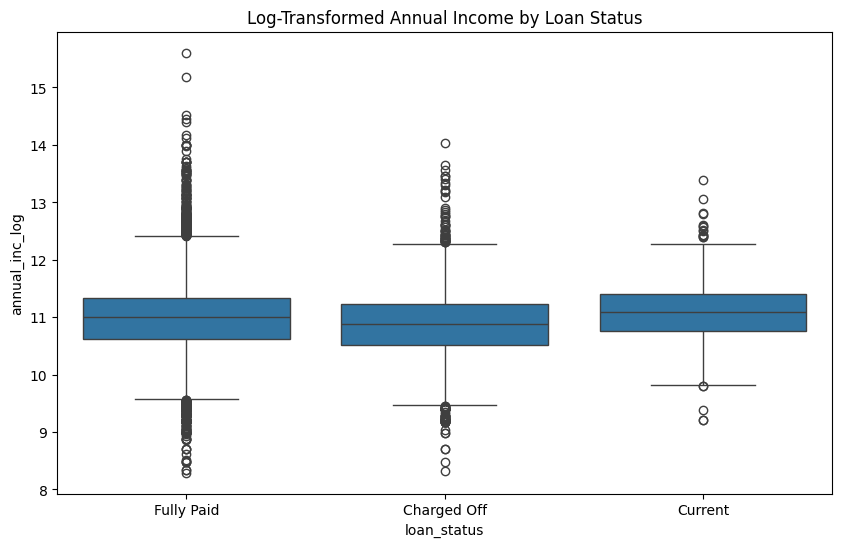


Debt-to-Income Ratio Statistics:
count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64


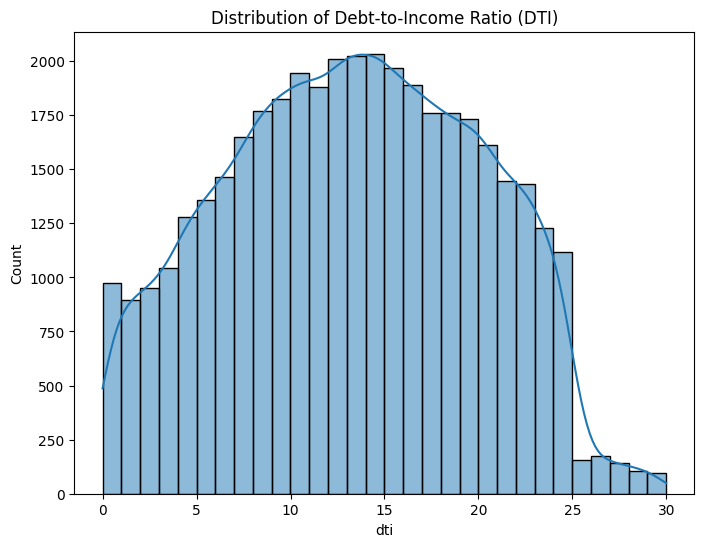

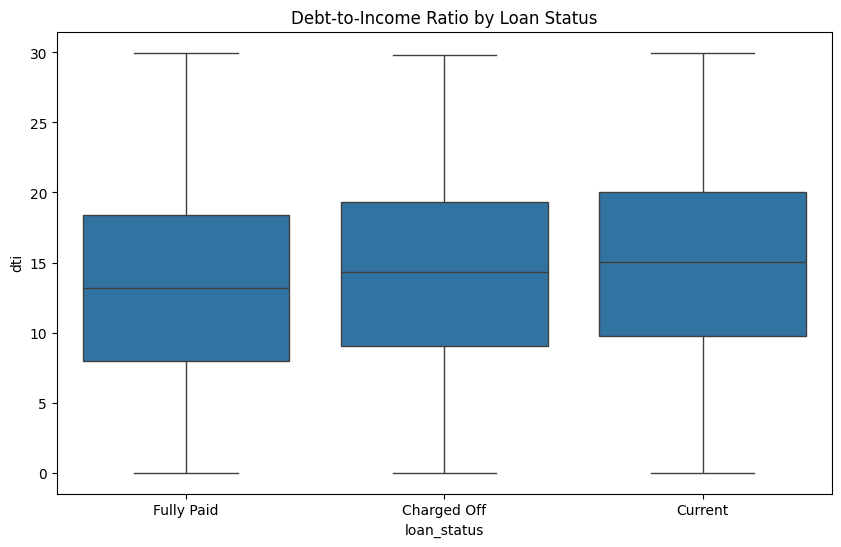


Loan Purpose Counts:
purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64


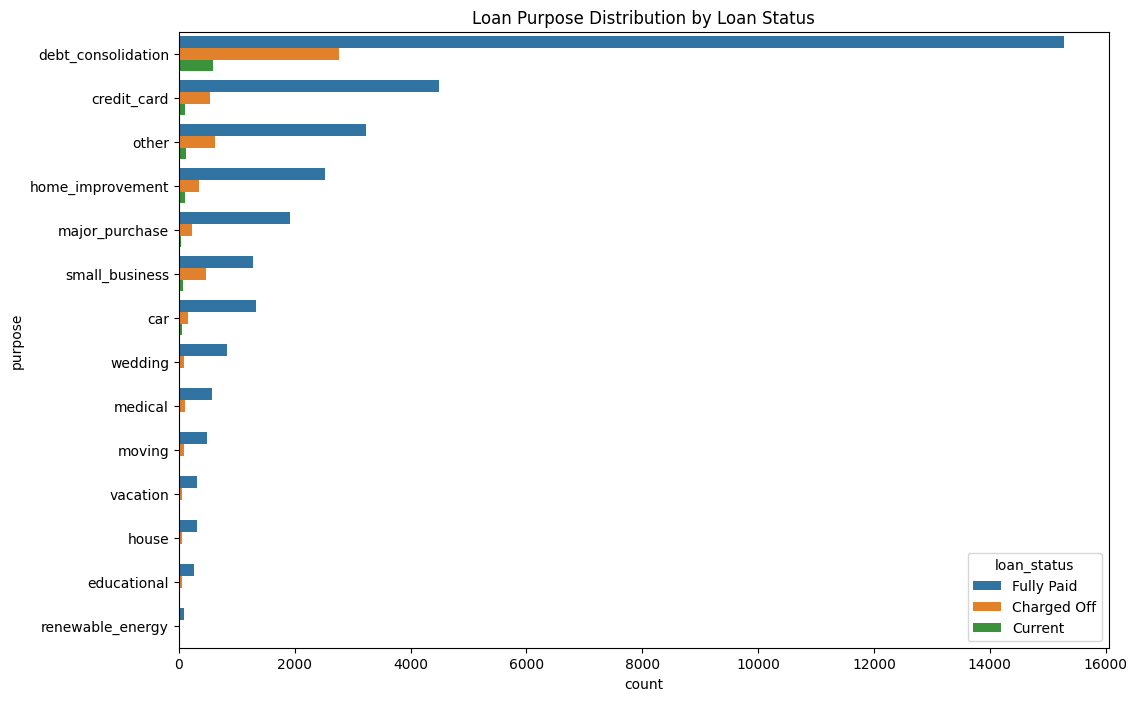


Number of Open Accounts Statistics:
count    39717.000000
mean         9.294408
std          4.400282
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64


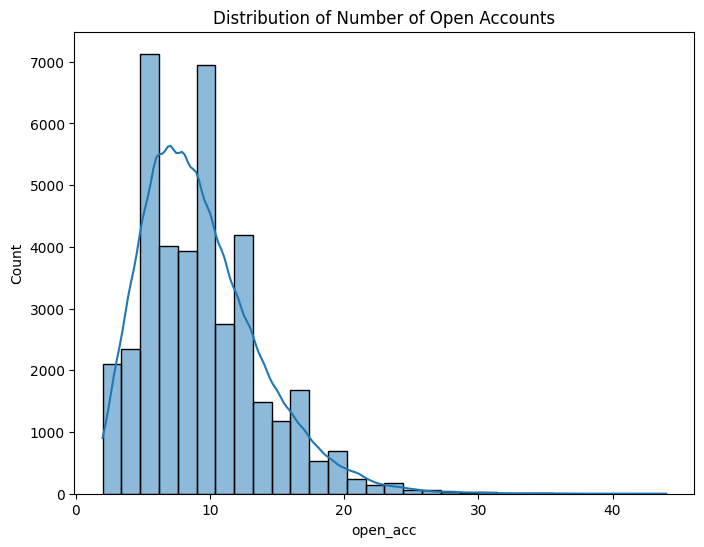

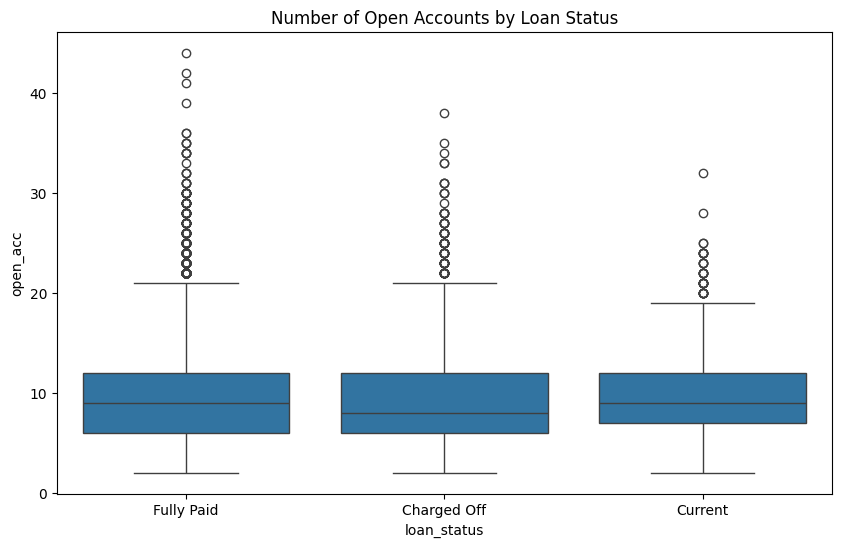


Revolving Credit Utilization Statistics:
count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64


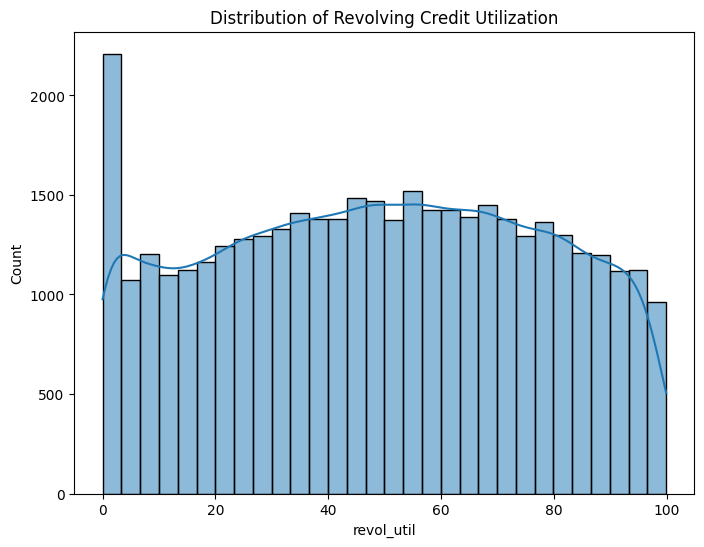

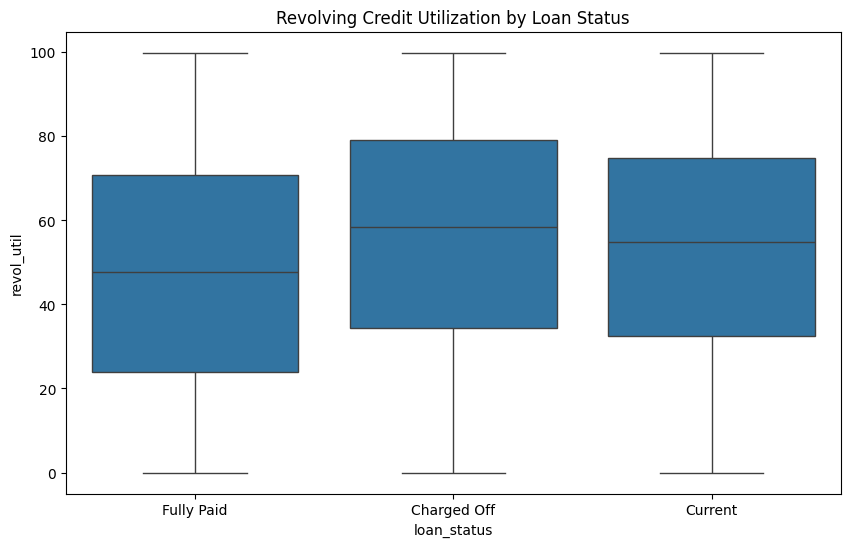


Delinquency in Last 2 Years Statistics:
count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64


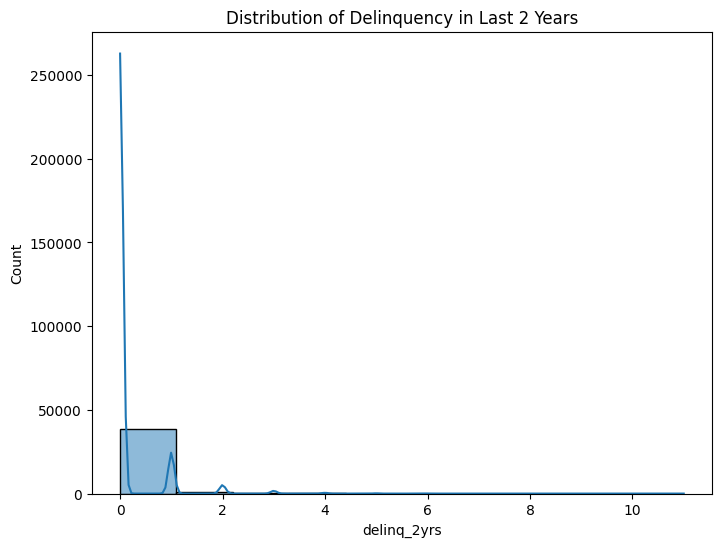

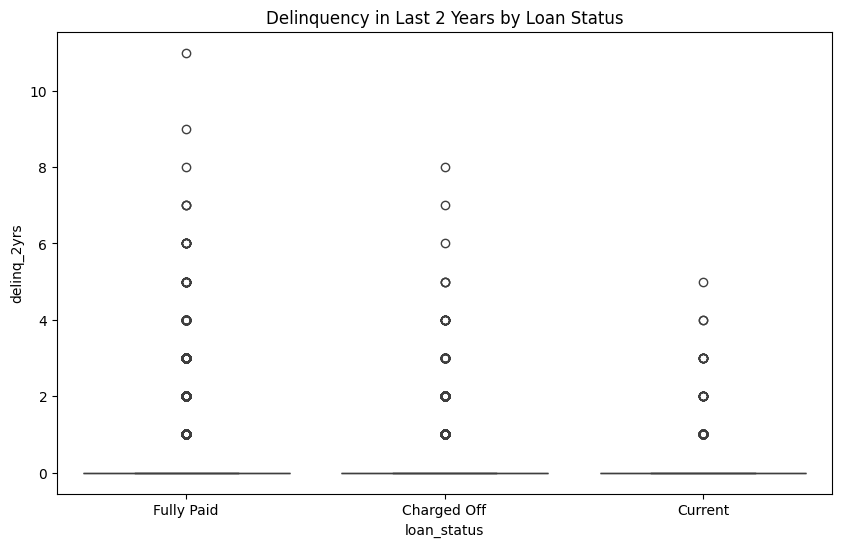


Public Records Statistics:
count    39717.000000
mean         0.055065
std          0.237200
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64


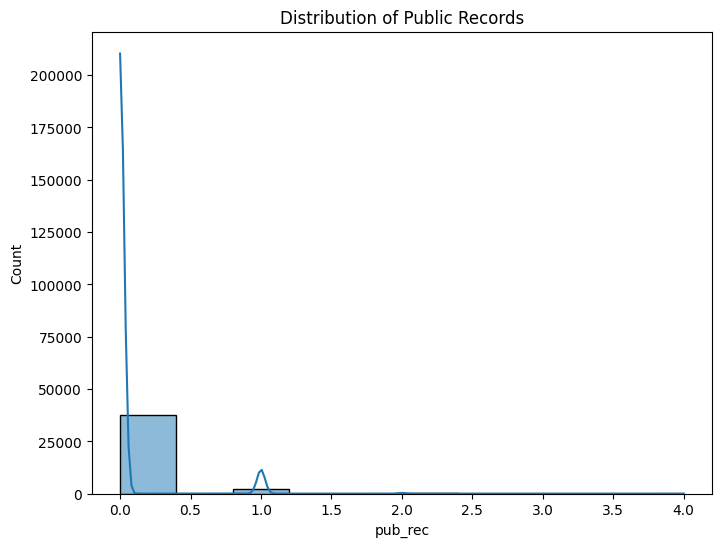

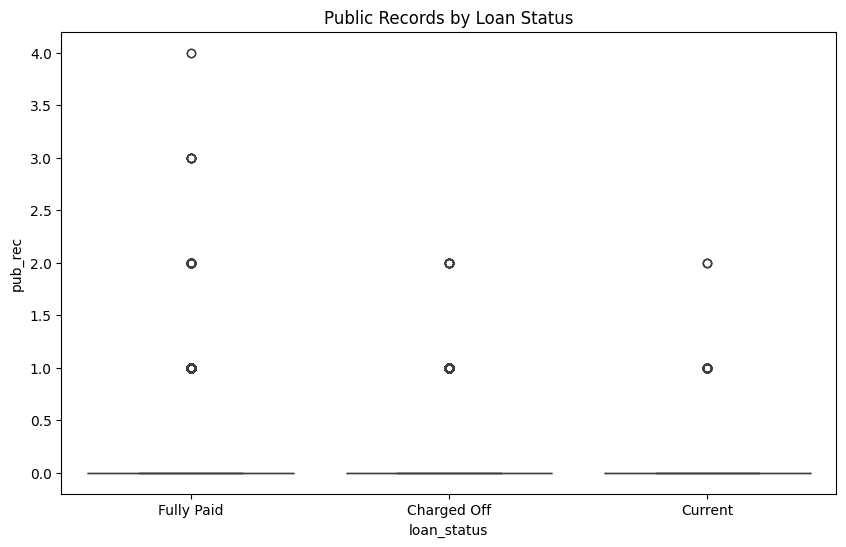


Verification Status Counts:
verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64


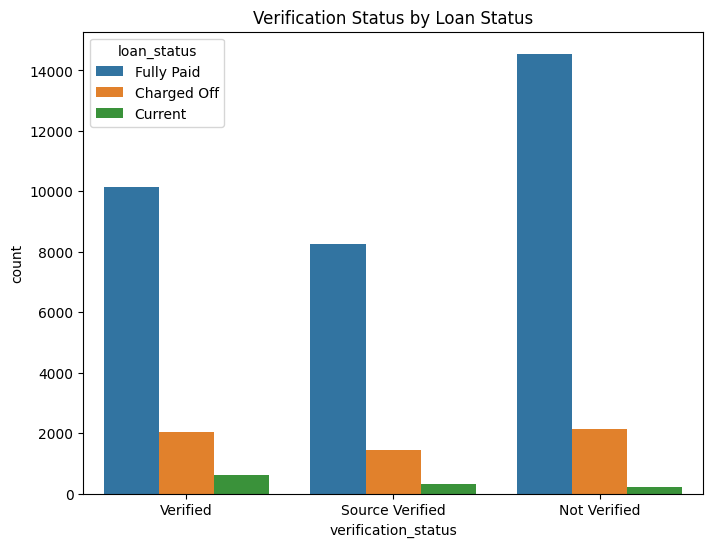

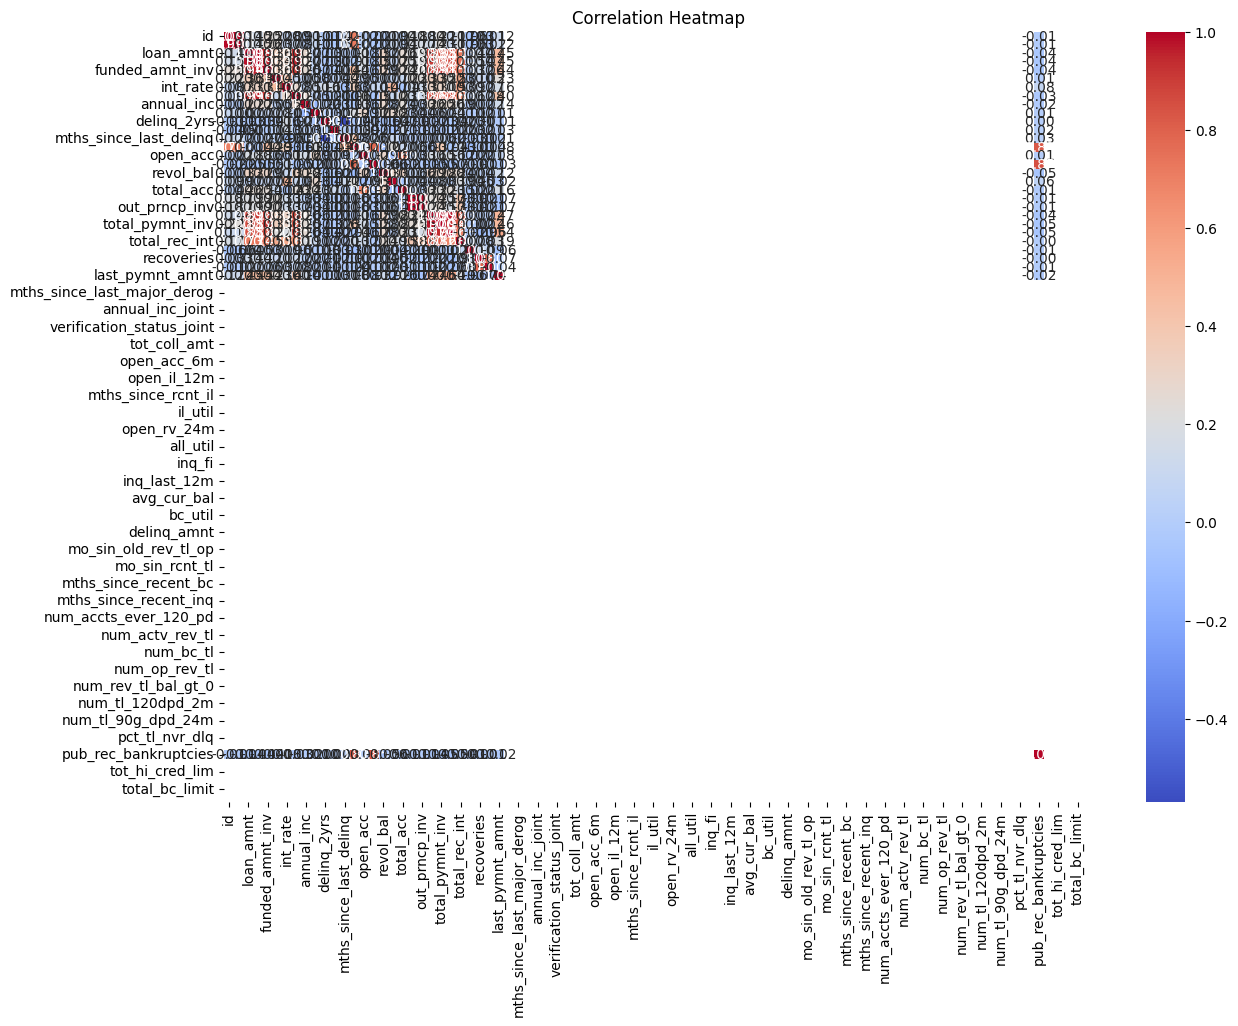

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
loan_data = pd.read_csv('loan.csv')

# Clean the `term` column: Extract the numeric value
loan_data['term'] = loan_data['term'].apply(lambda x: int(x.strip().split()[0]))

# Clean the `int_rate` and `revol_util` columns: Remove the '%' symbol and convert to float
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%', '').astype(float)
loan_data['revol_util'] = loan_data['revol_util'].str.replace('%', '').astype(float)

# Identify non-numeric columns
non_numeric_columns = loan_data.select_dtypes(exclude=[np.number]).columns
print("Non-Numeric Columns:")
print(non_numeric_columns)

# Remove non-numeric columns before correlation
numeric_loan_data = loan_data.select_dtypes(include=[np.number])

# 1. Loan Status (`loan_status`)
loan_status_counts = loan_data['loan_status'].value_counts()
print("Loan Status Counts:")
print(loan_status_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=loan_data)
plt.title('Distribution of Loan Status')
plt.show()

# 2. Interest Rate (`int_rate`)
int_rate_stats = loan_data['int_rate'].describe()
print("\nInterest Rate Statistics:")
print(int_rate_stats)

plt.figure(figsize=(8, 6))
sns.histplot(loan_data['int_rate'], bins=30, kde=True)
plt.title('Distribution of Interest Rate')
plt.show()

# Interest Rate vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_data)
plt.title('Interest Rate by Loan Status')
plt.show()

# 3. Loan Term (`term`)
term_counts = loan_data['term'].value_counts()
print("\nLoan Term Counts:")
print(term_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='term', data=loan_data, hue='loan_status')
plt.title('Loan Term Distribution by Loan Status')
plt.show()

# 4. Employment Length (`emp_length`)
emp_length_counts = loan_data['emp_length'].value_counts()
print("\nEmployment Length Counts:")
print(emp_length_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='emp_length', data=loan_data, hue='loan_status')
plt.title('Employment Length Distribution by Loan Status')
plt.xticks(rotation=45)
plt.show()

# 5. Home Ownership (`home_ownership`)
home_ownership_counts = loan_data['home_ownership'].value_counts()
print("\nHome Ownership Counts:")
print(home_ownership_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='home_ownership', data=loan_data, hue='loan_status')
plt.title('Home Ownership Distribution by Loan Status')
plt.show()

# 6. Annual Income (`annual_inc`)
annual_inc_stats = loan_data['annual_inc'].describe()
print("\nAnnual Income Statistics:")
print(annual_inc_stats)

plt.figure(figsize=(8, 6))
sns.histplot(loan_data['annual_inc'], bins=50, kde=True)
plt.title('Distribution of Annual Income')
plt.show()

# Annual Income (log-transformed) vs Loan Status
loan_data['annual_inc_log'] = np.log1p(loan_data['annual_inc'])
annual_inc_log_stats = loan_data['annual_inc_log'].describe()
print("\nLog-Transformed Annual Income Statistics:")
print(annual_inc_log_stats)

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc_log', data=loan_data)
plt.title('Log-Transformed Annual Income by Loan Status')
plt.show()

# 7. Debt-to-Income Ratio (`dti`)
dti_stats = loan_data['dti'].describe()
print("\nDebt-to-Income Ratio Statistics:")
print(dti_stats)

plt.figure(figsize=(8, 6))
sns.histplot(loan_data['dti'], bins=30, kde=True)
plt.title('Distribution of Debt-to-Income Ratio (DTI)')
plt.show()

# DTI vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=loan_data)
plt.title('Debt-to-Income Ratio by Loan Status')
plt.show()

# 8. Purpose of the Loan (`purpose`)
purpose_counts = loan_data['purpose'].value_counts()
print("\nLoan Purpose Counts:")
print(purpose_counts)

plt.figure(figsize=(12, 8))
sns.countplot(y='purpose', data=loan_data, hue='loan_status', order=loan_data['purpose'].value_counts().index)
plt.title('Loan Purpose Distribution by Loan Status')
plt.show()

# 9. Number of Open Accounts (`open_acc`)
open_acc_stats = loan_data['open_acc'].describe()
print("\nNumber of Open Accounts Statistics:")
print(open_acc_stats)

plt.figure(figsize=(8, 6))
sns.histplot(loan_data['open_acc'], bins=30, kde=True)
plt.title('Distribution of Number of Open Accounts')
plt.show()

# Open Accounts vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='open_acc', data=loan_data)
plt.title('Number of Open Accounts by Loan Status')
plt.show()

# 10. Revolving Credit Utilization (`revol_util`)
revol_util_stats = loan_data['revol_util'].describe()
print("\nRevolving Credit Utilization Statistics:")
print(revol_util_stats)

plt.figure(figsize=(8, 6))
sns.histplot(loan_data['revol_util'], bins=30, kde=True)
plt.title('Distribution of Revolving Credit Utilization')
plt.show()

# Revolving Credit Utilization vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='revol_util', data=loan_data)
plt.title('Revolving Credit Utilization by Loan Status')
plt.show()

# 11. Delinquency History (`delinq_2yrs`)
delinq_2yrs_stats = loan_data['delinq_2yrs'].describe()
print("\nDelinquency in Last 2 Years Statistics:")
print(delinq_2yrs_stats)

plt.figure(figsize=(8, 6))
sns.histplot(loan_data['delinq_2yrs'], bins=10, kde=True)
plt.title('Distribution of Delinquency in Last 2 Years')
plt.show()

# Delinquency History vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='delinq_2yrs', data=loan_data)
plt.title('Delinquency in Last 2 Years by Loan Status')
plt.show()

# 12. Public Records (`pub_rec`)
pub_rec_stats = loan_data['pub_rec'].describe()
print("\nPublic Records Statistics:")
print(pub_rec_stats)

plt.figure(figsize=(8, 6))
sns.histplot(loan_data['pub_rec'], bins=10, kde=True)
plt.title('Distribution of Public Records')
plt.show()

# Public Records vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='pub_rec', data=loan_data)
plt.title('Public Records by Loan Status')
plt.show()

# 13. Verification Status (`verification_status`)
verification_status_counts = loan_data['verification_status'].value_counts()
print("\nVerification Status Counts:")
print(verification_status_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='verification_status', data=loan_data, hue='loan_status')
plt.title('Verification Status by Loan Status')
plt.show()

# Optional: Correlation Heatmap to Identify Relationships Between Variables
plt.figure(figsize=(14, 10))
corr = numeric_loan_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [41]:
# Print out all column names to verify existence of `fico_range_high`
print("Column names in the dataset:")
print(loan_data.columns.tolist())

Column names in the dataset:
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il

/var/folders/4v/6mdnm6fs2nn5qvhflh0fjzy80000gn/T/ipykernel_40875/3470665708.py:7: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan.csv')


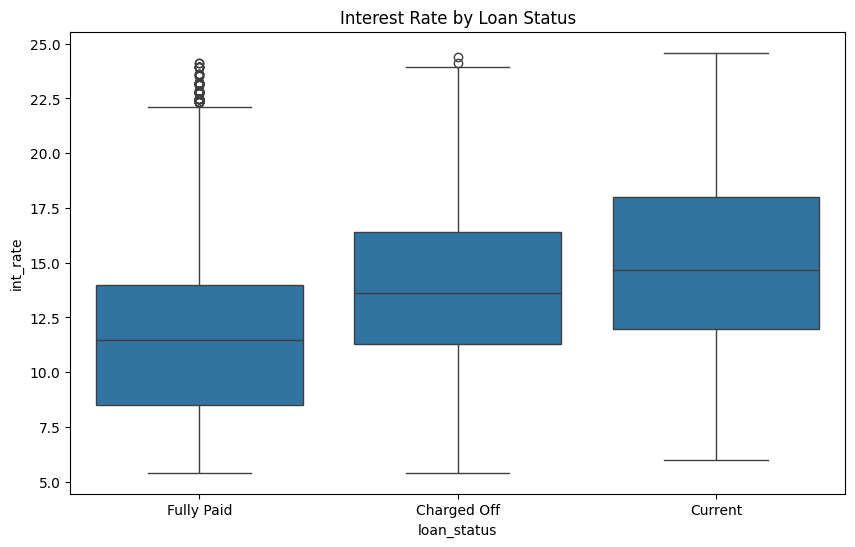

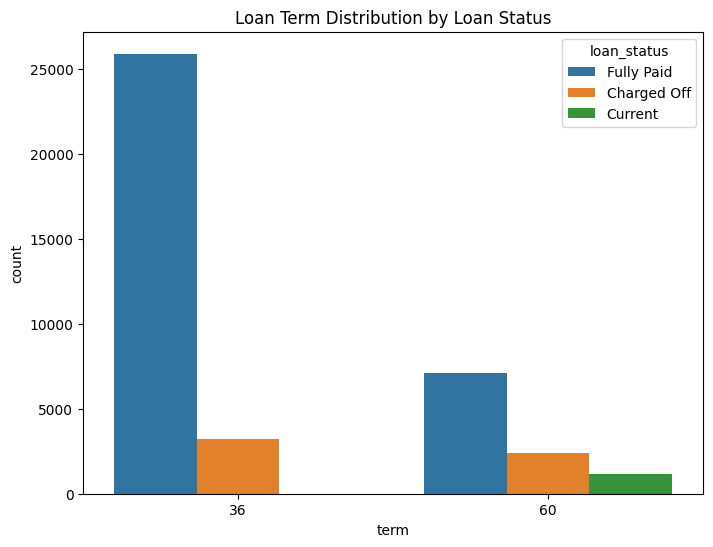

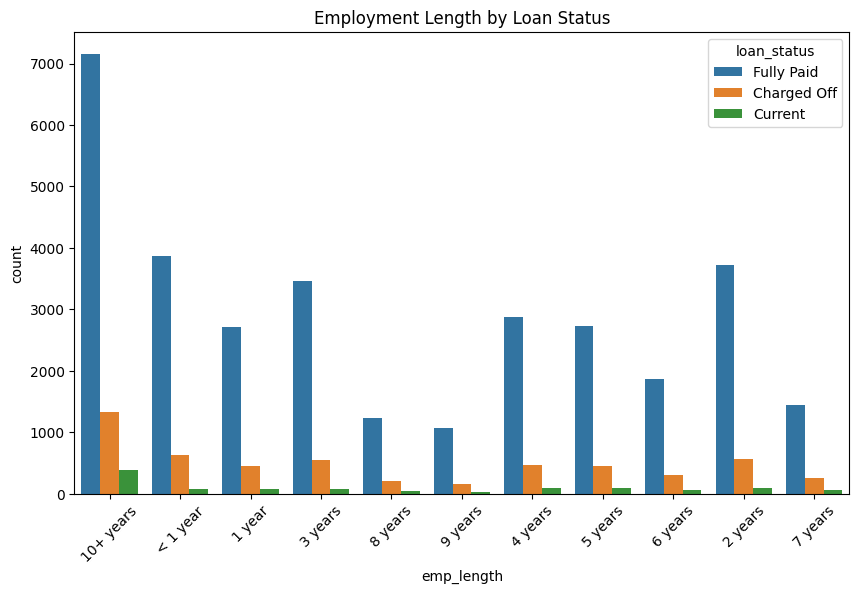

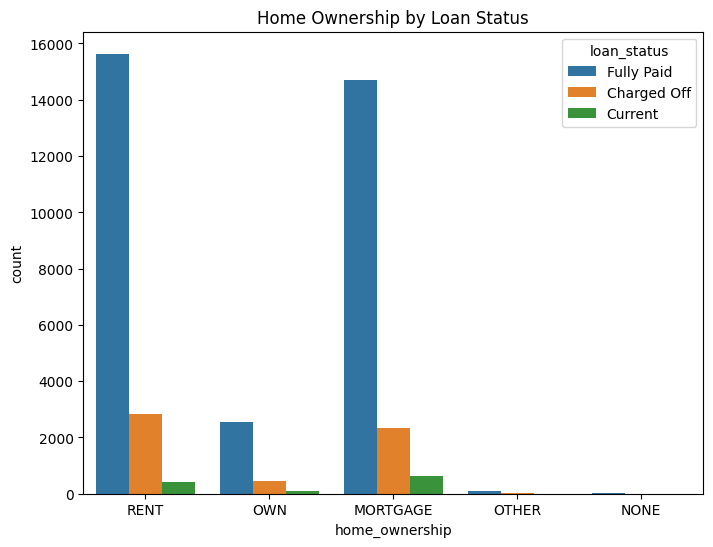

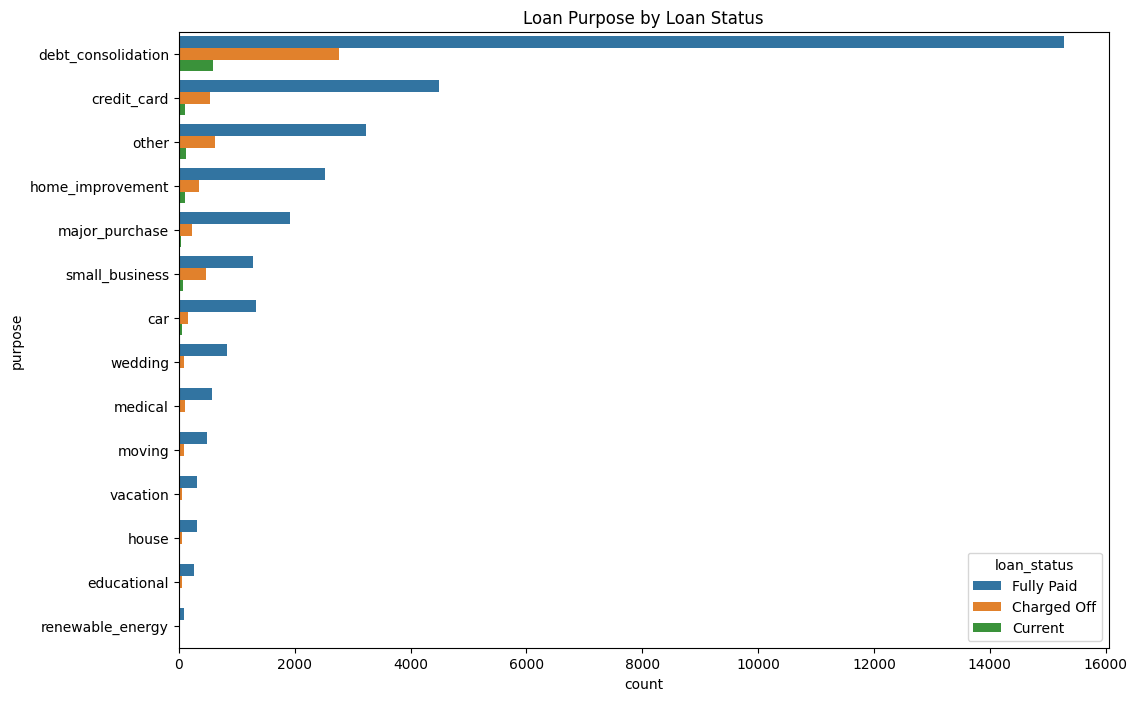

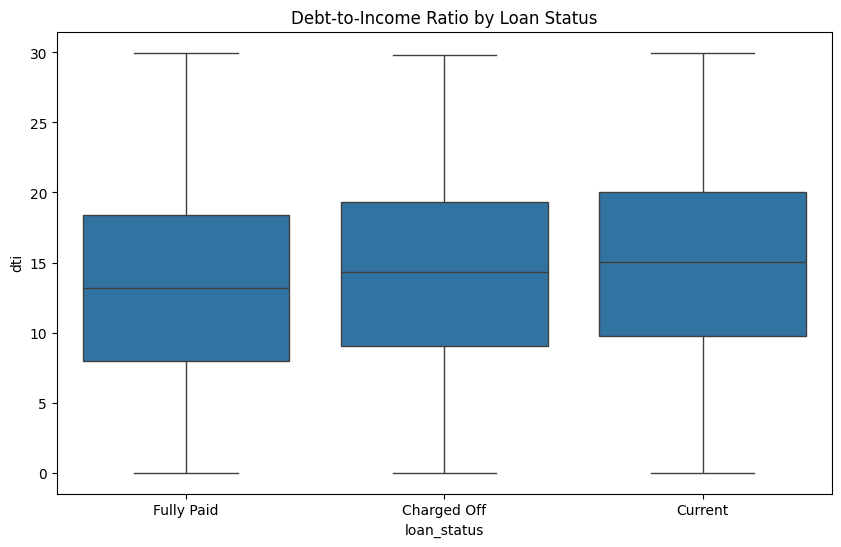

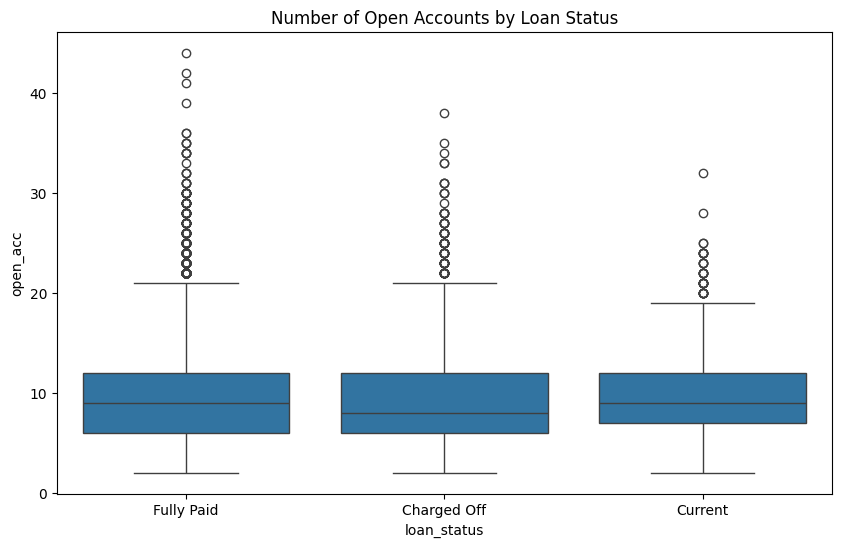

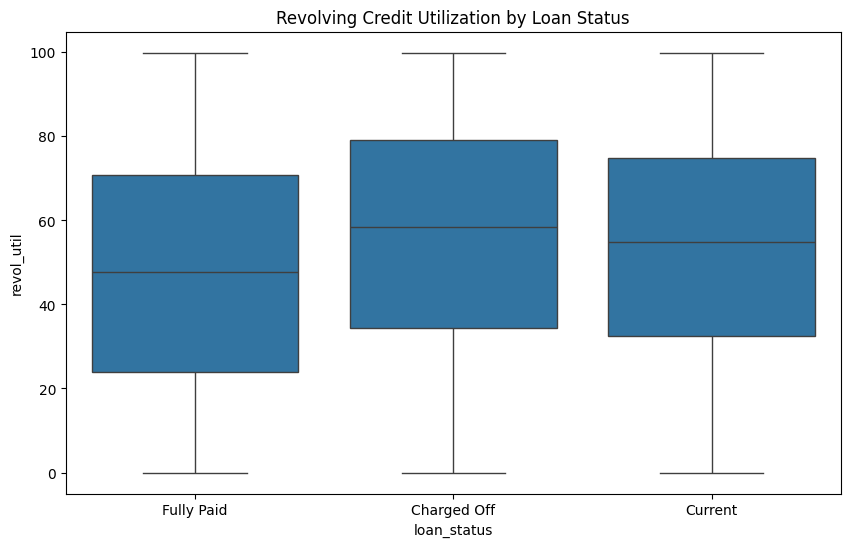


--- Interest Rate vs Loan Status ---
               count       mean       std   min    25%    50%    75%    max
loan_status                                                                
Charged Off   5627.0  13.820432  3.654413  5.42  11.31  13.61  16.40  24.40
Current       1140.0  15.031465  3.600343  6.00  11.99  14.65  17.99  24.59
Fully Paid   32950.0  11.609761  3.599964  5.42   8.49  11.49  13.99  24.11

--- Term vs Loan Status ---
loan_status  Charged Off   Current  Fully Paid
term                                          
36              0.110909  0.000000    0.889091
60              0.225967  0.107335    0.666698

--- Employment Length vs Loan Status ---
loan_status  Charged Off   Current  Fully Paid
emp_length                                    
1 year          0.140741  0.021914    0.837346
10+ years       0.149904  0.044036    0.806059
2 years         0.129216  0.022106    0.848678
3 years         0.135531  0.020269    0.844200
4 years         0.134459  0.027357    0.8

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, chi2

# Load the dataset
loan_data = pd.read_csv('loan.csv')

# Clean the `term` column: Extract the numeric value
loan_data['term'] = loan_data['term'].apply(lambda x: int(x.strip().split()[0]))

# Clean the `int_rate` and `revol_util` columns: Remove the '%' symbol and convert to float
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%', '').astype(float)
loan_data['revol_util'] = loan_data['revol_util'].str.replace('%', '').astype(float)

# Initialize a dictionary to store the logs
bivariate_logs = {}

# Bivariate Analysis: Relationship between Interest Rate and Loan Status
interest_rate_vs_status = loan_data.groupby('loan_status')['int_rate'].describe()
bivariate_logs['Interest Rate vs Loan Status'] = interest_rate_vs_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_data)
plt.title('Interest Rate by Loan Status')
plt.show()

# Bivariate Analysis: Relationship between Term and Loan Status
term_vs_status = pd.crosstab(loan_data['term'], loan_data['loan_status'], normalize='index')
bivariate_logs['Term vs Loan Status'] = term_vs_status
plt.figure(figsize=(8, 6))
sns.countplot(x='term', data=loan_data, hue='loan_status')
plt.title('Loan Term Distribution by Loan Status')
plt.show()

# Bivariate Analysis: Relationship between Employment Length and Loan Status
employment_length_vs_status = pd.crosstab(loan_data['emp_length'], loan_data['loan_status'], normalize='index')
bivariate_logs['Employment Length vs Loan Status'] = employment_length_vs_status
plt.figure(figsize=(10, 6))
sns.countplot(x='emp_length', data=loan_data, hue='loan_status')
plt.title('Employment Length by Loan Status')
plt.xticks(rotation=45)
plt.show()

# Bivariate Analysis: Relationship between Home Ownership and Loan Status
home_ownership_vs_status = pd.crosstab(loan_data['home_ownership'], loan_data['loan_status'], normalize='index')
bivariate_logs['Home Ownership vs Loan Status'] = home_ownership_vs_status
plt.figure(figsize=(8, 6))
sns.countplot(x='home_ownership', data=loan_data, hue='loan_status')
plt.title('Home Ownership by Loan Status')
plt.show()

# Bivariate Analysis: Relationship between Purpose and Loan Status
purpose_vs_status = pd.crosstab(loan_data['purpose'], loan_data['loan_status'], normalize='index')
bivariate_logs['Purpose vs Loan Status'] = purpose_vs_status
plt.figure(figsize=(12, 8))
sns.countplot(y='purpose', data=loan_data, hue='loan_status', order=loan_data['purpose'].value_counts().index)
plt.title('Loan Purpose by Loan Status')
plt.show()

# Bivariate Analysis: Relationship between Debt-to-Income Ratio and Loan Status
dti_vs_status = loan_data.groupby('loan_status')['dti'].describe()
bivariate_logs['Debt-to-Income Ratio vs Loan Status'] = dti_vs_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=loan_data)
plt.title('Debt-to-Income Ratio by Loan Status')
plt.show()

# Bivariate Analysis: Relationship between Number of Open Accounts and Loan Status
open_acc_vs_status = loan_data.groupby('loan_status')['open_acc'].describe()
bivariate_logs['Open Accounts vs Loan Status'] = open_acc_vs_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='open_acc', data=loan_data)
plt.title('Number of Open Accounts by Loan Status')
plt.show()

# Bivariate Analysis: Relationship between Revolving Credit Utilization and Loan Status
revol_util_vs_status = loan_data.groupby('loan_status')['revol_util'].describe()
bivariate_logs['Revolving Credit Utilization vs Loan Status'] = revol_util_vs_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='revol_util', data=loan_data)
plt.title('Revolving Credit Utilization by Loan Status')
plt.show()

# Output the logs for sharing
for key, log in bivariate_logs.items():
    print(f"\n--- {key} ---")
    print(log)


--- Income Segment vs Loan Status ---
loan_status     Charged Off   Current  Fully Paid
income_segment                                   
Low                0.177039  0.018127    0.804834
Medium             0.145984  0.030522    0.823494
High               0.135886  0.030208    0.833906
Very High          0.107765  0.035955    0.856280


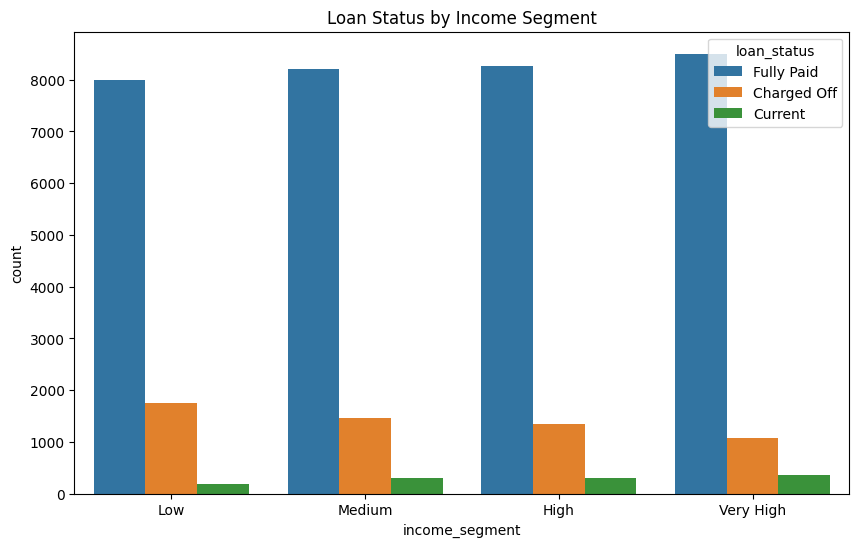

In [59]:
# Segment borrowers into income quartiles
loan_data['income_segment'] = pd.qcut(loan_data['annual_inc'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Analyze default rates by income segment
income_segment_vs_status = pd.crosstab(loan_data['income_segment'], loan_data['loan_status'], normalize='index')
print("\n--- Income Segment vs Loan Status ---")
print(income_segment_vs_status)

plt.figure(figsize=(10, 6))
sns.countplot(x='income_segment', data=loan_data, hue='loan_status')
plt.title('Loan Status by Income Segment')
plt.show()


--- Loan Term vs Loan Status ---
loan_status  Charged Off   Current  Fully Paid
term                                          
36              0.110909  0.000000    0.889091
60              0.225967  0.107335    0.666698


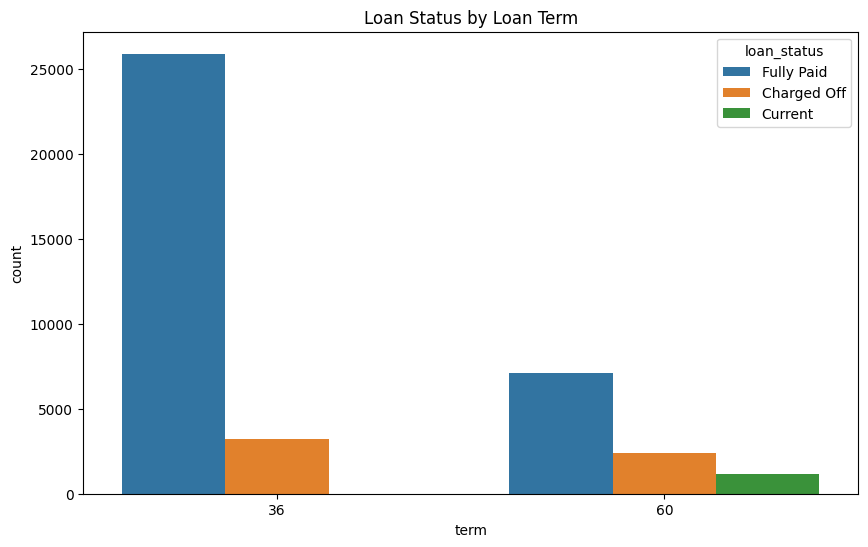

In [60]:
# Analyze default rates by loan term
term_vs_status = pd.crosstab(loan_data['term'], loan_data['loan_status'], normalize='index')
print("\n--- Loan Term vs Loan Status ---")
print(term_vs_status)

plt.figure(figsize=(10, 6))
sns.countplot(x='term', data=loan_data, hue='loan_status')
plt.title('Loan Status by Loan Term')
plt.show()


--- Purpose vs Loan Status ---
loan_status         Charged Off   Current  Fully Paid
purpose                                              
car                    0.103292  0.032279    0.864429
credit_card            0.105653  0.020078    0.874269
debt_consolidation     0.148436  0.031436    0.820128
educational            0.172308  0.000000    0.827692
home_improvement       0.116599  0.033938    0.849462
house                  0.154856  0.036745    0.808399
major_purchase         0.101509  0.016918    0.881573
medical                0.152958  0.017316    0.829726
moving                 0.157804  0.012007    0.830189
other                  0.158527  0.032056    0.809416
renewable_energy       0.184466  0.009709    0.805825
small_business         0.259847  0.040481    0.699672
vacation               0.139108  0.015748    0.845144
wedding                0.101373  0.022175    0.876452


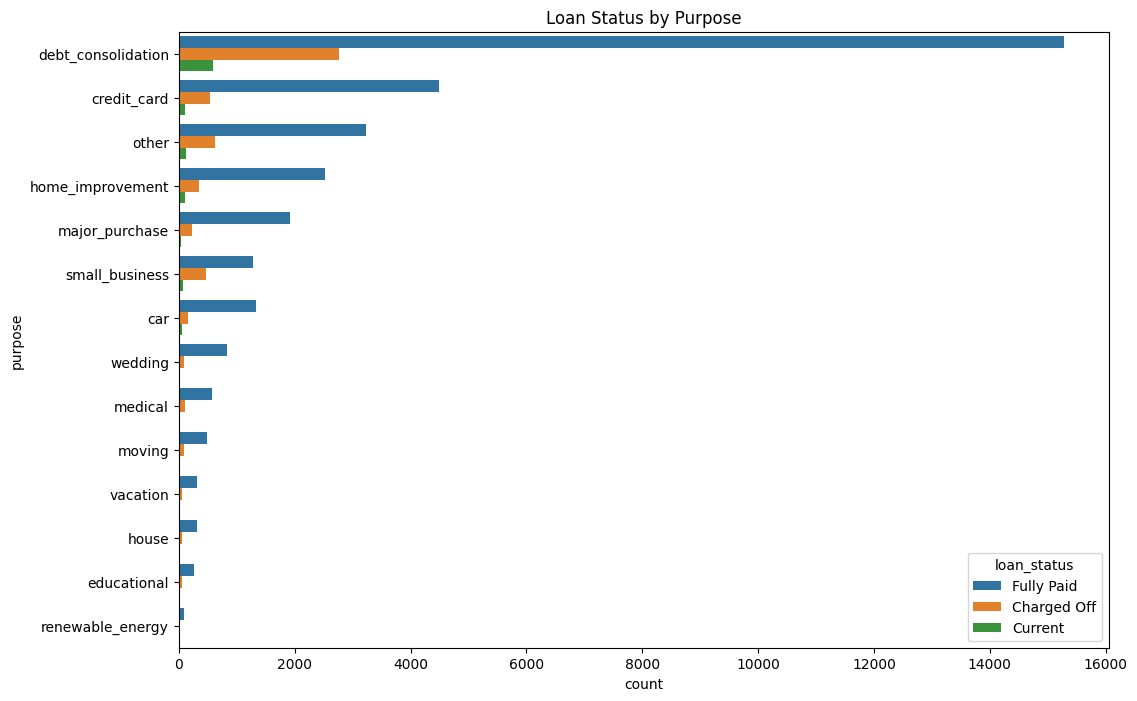

In [61]:
# Analyze default rates by loan purpose
purpose_vs_status = pd.crosstab(loan_data['purpose'], loan_data['loan_status'], normalize='index')
print("\n--- Purpose vs Loan Status ---")
print(purpose_vs_status)

plt.figure(figsize=(12, 8))
sns.countplot(y='purpose', data=loan_data, hue='loan_status', order=loan_data['purpose'].value_counts().index)
plt.title('Loan Status by Purpose')
plt.show()


--- Home Ownership vs Loan Status ---
loan_status     Charged Off   Current  Fully Paid
home_ownership                                   
MORTGAGE           0.131774  0.036129    0.832097
NONE               0.000000  0.000000    1.000000
OTHER              0.183673  0.000000    0.816327
OWN                0.144866  0.027142    0.827992
RENT               0.150220  0.022170    0.827610


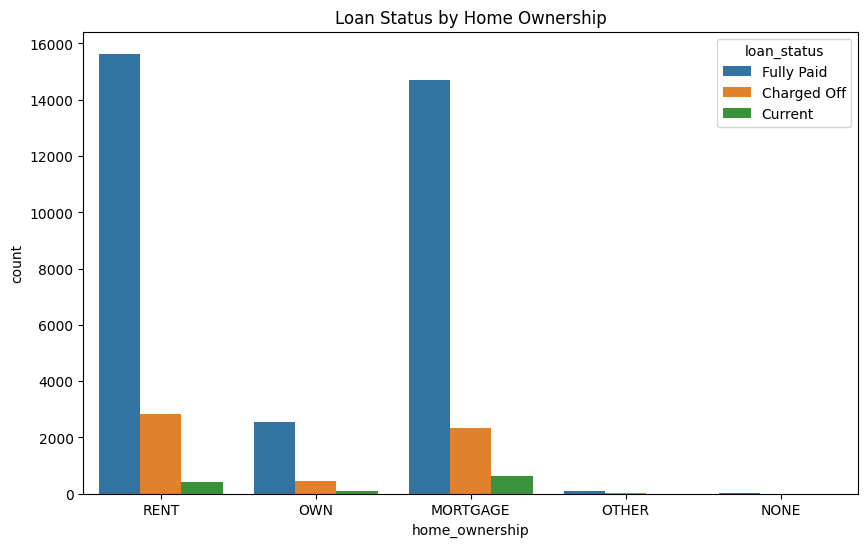

In [62]:
# Analyze default rates by home ownership
home_ownership_vs_status = pd.crosstab(loan_data['home_ownership'], loan_data['loan_status'], normalize='index')
print("\n--- Home Ownership vs Loan Status ---")
print(home_ownership_vs_status)

plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', data=loan_data, hue='loan_status')
plt.title('Loan Status by Home Ownership')
plt.show()

In [63]:
###1. Correlation Analysis


/var/folders/4v/6mdnm6fs2nn5qvhflh0fjzy80000gn/T/ipykernel_40875/483732007.py:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan.csv')


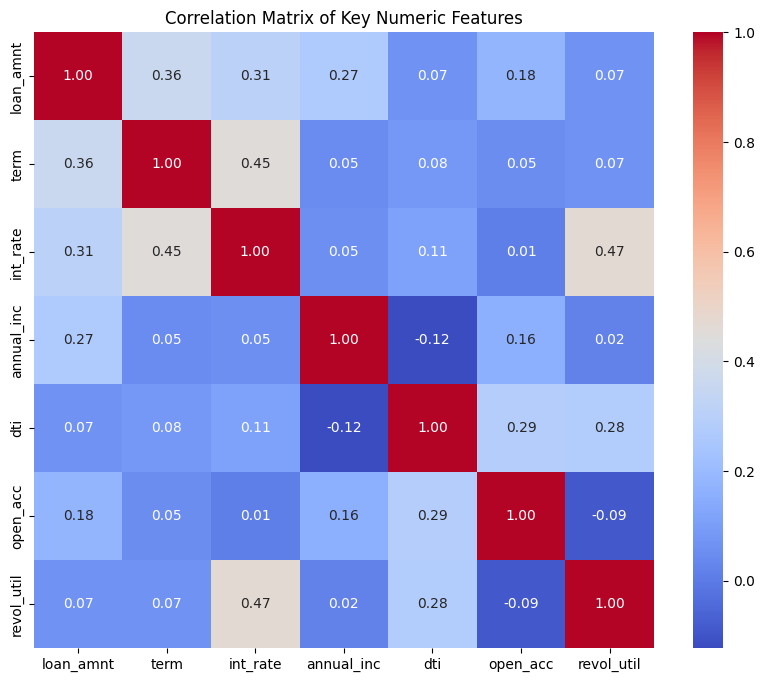

            loan_amnt      term  int_rate  annual_inc       dti  open_acc  \
loan_amnt    1.000000  0.361036  0.309415    0.271149  0.066439  0.177168   
term         0.361036  1.000000  0.451699    0.046675  0.082426  0.050769   
int_rate     0.309415  0.451699  1.000000    0.053185  0.111162  0.010395   
annual_inc   0.271149  0.046675  0.053185    1.000000 -0.122732  0.158200   
dti          0.066439  0.082426  0.111162   -0.122732  1.000000  0.288045   
open_acc     0.177168  0.050769  0.010395    0.158200  0.288045  1.000000   
revol_util   0.066149  0.069834  0.467168    0.017926  0.277951 -0.089891   

            revol_util  
loan_amnt     0.066149  
term          0.069834  
int_rate      0.467168  
annual_inc    0.017926  
dti           0.277951  
open_acc     -0.089891  
revol_util    1.000000  


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
loan_data = pd.read_csv('loan.csv')

# Clean the data: Extract numeric values from the `term` column and convert percentage strings
loan_data['term'] = loan_data['term'].apply(lambda x: int(x.strip().split()[0]))
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%', '').astype(float)
loan_data['revol_util'] = loan_data['revol_util'].str.replace('%', '').astype(float)

# Select relevant numeric features for correlation analysis
numeric_features = ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'revol_util']

# Calculate correlation matrix
corr_matrix = loan_data[numeric_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Numeric Features')
plt.show()

# Print the correlation matrix for reference
print(corr_matrix)

In [66]:
###2. Hypothesis Testing


In [66]:
###2. Hypothesis Testing


In [67]:
#a. T-test for Income Segments


In [73]:
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np

# Load the dataset
loan_data = pd.read_csv('loan.csv')

# Clean the data: Extract numeric values from the `term` column and convert percentage strings
loan_data['term'] = loan_data['term'].apply(lambda x: int(x.strip().split()[0]))
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%', '').astype(float)
loan_data['revol_util'] = loan_data['revol_util'].str.replace('%', '').astype(float)

# Create income segments using quartiles
loan_data['income_segment'] = pd.qcut(loan_data['annual_inc'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Ensure the segment was created successfully
print("Income Segments Distribution:")
print(loan_data['income_segment'].value_counts())

# Create a binary target variable for default (1 if Charged Off, 0 otherwise)
loan_data['default'] = loan_data['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

# Perform t-test between the lowest and highest income segments
low_income_default_rate = loan_data[loan_data['income_segment'] == 'Low']['default']
high_income_default_rate = loan_data[loan_data['income_segment'] == 'Very High']['default']

t_stat, p_value = ttest_ind(low_income_default_rate, high_income_default_rate)
print(f"T-test between Low and Very High Income Segments:\nT-statistic = {t_stat}, P-value = {p_value}")

Income Segments Distribution:
income_segment
Medium       9960
Low          9930
Very High    9929
High         9898
Name: count, dtype: int64
T-test between Low and Very High Income Segments:
T-statistic = 14.035869686949178, P-value = 1.5354976318767836e-44


/var/folders/4v/6mdnm6fs2nn5qvhflh0fjzy80000gn/T/ipykernel_40875/2123276627.py:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan.csv')


In [70]:
#b. Chi-Square Test for Loan Term
from scipy.stats import chi2_contingency

# Create a contingency table for loan term and loan status
term_contingency_table = pd.crosstab(loan_data['term'], loan_data['loan_status'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(term_contingency_table)
print(f"Chi-Square Test for Loan Term and Loan Status:\nChi2-statistic = {chi2_stat}, P-value = {p_value}")

Chi-Square Test for Loan Term and Loan Status:
Chi2-statistic = 4313.9089333462325, P-value = 0.0


In [71]:
## c. Chi-Square Test for Loan Purpose
# Create a contingency table for loan purpose and loan status
purpose_contingency_table = pd.crosstab(loan_data['purpose'], loan_data['loan_status'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(purpose_contingency_table)
print(f"Chi-Square Test for Loan Purpose and Loan Status:\nChi2-statistic = {chi2_stat}, P-value = {p_value}")

Chi-Square Test for Loan Purpose and Loan Status:
Chi2-statistic = 445.69504821530666, P-value = 5.473057657367658e-78
